# Binary Classification

In [1]:
import numpy as np
import matplotlib.pyplot as pl

Let's first load the data.

In [5]:
data = np.loadtxt('./linear_classifier_data.csv',
                  skiprows=1,
                  delimiter=',')
data.shape

(2000, 3)

In [10]:
data[0:10,:]

array([[ 0.4291984 , -1.98025428,  0.        ],
       [-3.70546459, -0.04070956,  0.        ],
       [ 0.65227934, -2.15956766,  0.        ],
       [ 1.63746779, -2.01275478,  0.        ],
       [-3.29335312, -2.1889127 ,  0.        ],
       [-3.77969312, -2.00176297,  0.        ],
       [-0.84447729, -1.91399425,  0.        ],
       [-0.16021555, -2.0953902 ,  0.        ],
       [ 1.63611407, -3.20718777,  0.        ],
       [-4.7960448 , -1.77935421,  0.        ]])

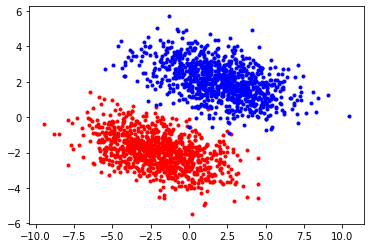

In [13]:
# Plot the two classes

x_data = data[:, :2]
y_data = data[:, -1]

I0 = y_data == 0
I1 = y_data == 1

pl.plot(x_data[I0,0], x_data[I0, 1], '.', color='red')
pl.plot(x_data[I1,0], x_data[I1, 1], '.', color='blue');


Define the necessary functions:

- sigmoid function: `sigmoid`

- the model: `f`

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [15]:
def f(x, w, b):
    return sigmoid(x @ w + b)

We can use `f` to perform classification.

- Assume some (bad choice) of $(w, b)$.

- Let $z = f(x, w, b)$, and classify the input $x$ according to the rules:

    1. if $z < 0.5$, then $y = 0$.
    2. if $z \geq 0.5$, then $y = 1$.

In [16]:
# Purely randomly arbitrary choices of w, b

w = np.array([1, 1])
b = 3.0

z = f(x_data, w, b)

In [17]:
# convert z to y_pred
n = 2000
y_pred = np.zeros(n)
y_pred[z >= 0.5] = 1

In [20]:
np.sum(y_data != y_pred) / n

0.1535

**Visualization**

Plotting the classification of this randomly obtained classifier.

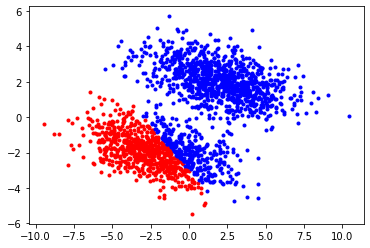

In [21]:
I0 = z < 0.5
I1 = z >= 0.5

pl.plot(x_data[I0, 0], x_data[I0, 1], '.', color='red')
pl.plot(x_data[I1, 0], x_data[I1, 1], '.', color='blue');

# Loss function

The loss function is the _binary cross entropy_ between
the output $z$ and the true outputs `y_data`.

In [22]:
def loss(w, b):
    z = f(x_data, w, b)
    L = -(y_data * np.log(z) + (1-y_data)*np.log(1-z))
    return np.sum(L)

In [23]:
loss(w, b)

657.8172881473456

The gradient of the loss function:

- $\partial L/\partial w_i$ for $i=1,2$.
- $\partial L/\partial b$

In [24]:
def loss_grad(w, b):
    z = f(x_data, w, b)
    grad_w = x_data.T @ (z - y_data)
    grad_b = np.sum(z-y_data)
    return grad_w, grad_b

# Gradient Descent For Training

Implement the training loop

In [29]:
def train(w0, b0, alpha, epochs):
    w = np.array(w0, dtype=float)
    b = b0
    for i in range(epochs):
        w_grad, b_grad = loss_grad(w, b)
        w -= alpha * w_grad
        b -= alpha * b_grad
        L = loss(w, b)
        if (i % (epochs//10)) == 0:
            print(L)
    return w, b

Train the model using `x_data` and `y_data`.

In [33]:
w, b = train([1, 1], 3, 1e-5, 10000)

651.6292627208088
75.01786497105272
46.89405722765157
36.34232834585635
30.8145205224181
27.440643640318484
25.189528431650338
23.59654636701984
22.420894583595874
21.525213191077068


Use the parameters from the training.

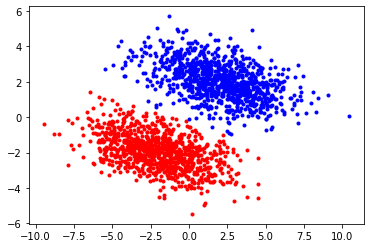

In [34]:
z = f(x_data, w, b)
I0 = z < 0.5
I1 = z >= 0.5

pl.plot(x_data[I0, 0], x_data[I0, 1], '.', color='red')
pl.plot(x_data[I1, 0], x_data[I1, 1], '.', color='blue');

# Visualization of the separation boundary

Let's look at the separation boundary used by
the classifier.

Steps to take:

1. Generate a 2D meshgrid: $100\times 100$ points.


2. For each of the $10,000$ points, we will compute the
`z` value based on the model.


3. Plot the contour of `z` w.r.t. to the meshgrid.

In [35]:
# Generate the 2D meshgrid

xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(xs, ys)

In [36]:
# Compute the z-values at each grid point.

z = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        x = xx[i][j]
        y = yy[i][j]
        z[i, j] = f(np.array([x, y]), w, b)

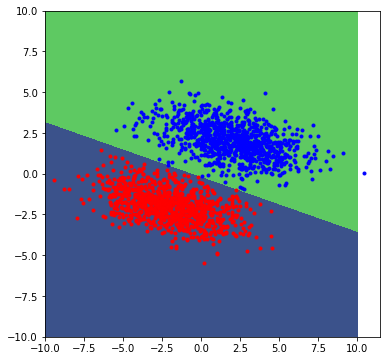

In [42]:
# Plot z as a contour plot

pl.figure(figsize=(6,6))
pl.contourf(xx, yy, z, levels=[0., 0.5, 1.])

z = f(x_data, w, b)
I0 = z < 0.5
I1 = z >= 0.5

pl.plot(x_data[I0, 0], x_data[I0, 1], '.', color='red')
pl.plot(x_data[I1, 0], x_data[I1, 1], '.', color='blue');